# Usage of ULMFiT-pretrained models and the fastai_ulmfit library

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/floleuerer/fastai_ulmfit/blob/main/fastai_ulmfit_pretrained_usage.ipynb)

Install required packages for **Colab** and import them.

Please make sure to use a **GPU runtime** on Colab!

In [ ]:
pip install -Uq fastai==2.2.7 sentencepiece==0.1.95 fastcore==1.3.19 fastai-ulmfit

In [ ]:
from fastai_ulmfit.pretrained import *
from fastai.text.all import *

## Prepare GermEval2019 Sentiment Analysis

This is a minimal Example and we are using a part of the **GermEval2019 Task 1** Training data - so the results will be worse than with the complete dataset. 

https://projects.fzai.h-da.de/iggsa/data-2019/

In [ ]:
!wget -P tmp/ https://projects.fzai.h-da.de/iggsa/wp-content/uploads/2019/09/germeval2019.training_subtask1_2_korrigiert.txt
!wget -P tmp/ https://projects.fzai.h-da.de/iggsa/wp-content/uploads/2019/08/germeval2019GoldLabelsSubtask1_2.txt

--2021-08-14 16:20:58--  https://projects.fzai.h-da.de/iggsa/wp-content/uploads/2019/09/germeval2019.training_subtask1_2_korrigiert.txt
Resolving projects.fzai.h-da.de (projects.fzai.h-da.de)... 141.100.60.75, 2001:67c:2184:82a:21a:4aff:fe16:1e6
Connecting to projects.fzai.h-da.de (projects.fzai.h-da.de)|141.100.60.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 697779 (681K) [text/plain]
Saving to: ‘tmp/germeval2019.training_subtask1_2_korrigiert.txt.9’

germeval2019.traini 100%[===================>] 681,42K  --.-KB/s    in 0,1s    

2021-08-14 16:20:58 (5,05 MB/s) - ‘tmp/germeval2019.training_subtask1_2_korrigiert.txt.9’ saved [697779/697779]

--2021-08-14 16:20:59--  https://projects.fzai.h-da.de/iggsa/wp-content/uploads/2019/08/germeval2019GoldLabelsSubtask1_2.txt
Resolving projects.fzai.h-da.de (projects.fzai.h-da.de)... 141.100.60.75, 2001:67c:2184:82a:21a:4aff:fe16:1e6
Connecting to projects.fzai.h-da.de (projects.fzai.h-da.de)|141.100.60.75|:443... 

Create dataframe from the downloaded files.

In [ ]:
names = ['text','label','label_fine']

df_train = pd.read_csv(f'tmp/germeval2019.training_subtask1_2_korrigiert.txt', sep = '\t', names=names)
df_train['is_valid'] = False

df_test = pd.read_csv('tmp/germeval2019GoldLabelsSubtask1_2.txt', sep ='\t', names=names)
df_test['is_valid'] = True

df = pd.concat([df_train, df_test])

Do some simple preprocessing - remove @-mentions and links from the tweets.

In [ ]:
def clean_text(text):
    text = re.sub('@\w+', ' ', text)
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = ' '.join(text.split())
    return text

df['text'] = df['text'].apply(clean_text)

In [ ]:
df

,text,label,label_fine,is_valid
0,Hat die Polizei keine Kanone mehr ? 20 mal in die Munition laufen lassen und Ruhe ist .,OFFENSE,ABUSE,False
1,"Arabien habt ihr mal wieder einen Orgasmus gebaucht oder weswegen habt ihr die Frau gekillt ? Erzählt mit aber nicht so einen verlogenen Scheißdreck bezogen auf "" sie hat gemordet denn im Lügen seit ihr ja Weltmeister was der Koran auch erlaubt.",OFFENSE,ABUSE,False
2,"Glaube ich nicht , die Bundesregierung so wie die Justiz ist so was von Korrupt und arbeiten so fleißig zusammen , das dies nicht erscheinen wird .",OFFENSE,ABUSE,False
3,"Doch schockierend viele Jugendliche wissen kaum mehr etwas über den Holocaust. Das ist nicht schockierend das ist gut so . Wie sollen junge Menschen Freundschaften mit Juden entwickeln ,wenn im Hinterkopf immer die verblödete Holocaust Suggestion Scheiße im Wege steht .",OFFENSE,PROFANITY,False
4,Sein Charakter war ihm wichtiger anstatt als billige Nute für Korrupte Regierungen zu arbeiten .Er hat das Leben begriffen,OFFENSE,PROFANITY,False
...,...,...,...,...
3026,Es fand aber nie eine Emanzipierungs-Phase der Zivil-Bevölkerung statt (wahrscheinlich weil das Militär jeder Abweichung im Wege stand). Gesellschaftlich ist die Türkei aus meiner Sicht daher noch zu sehr in der Vergangenheit verankert.,OTHER,OTHER,True
3027,"Um es klar zu stellen: Ich will hier kein White-Washing betreiben (hätte er die Unterstützung der Kurden gegen die Entente-Mächte wie versprochen belohnt, wäre etliches Leid in der Folge erspart geblieben). Just my 2 cents.",OTHER,OTHER,True
3028,"Und dann habe ich da noch die McArthur-Briefe im Sinn. Alles in allem ist mein Eindruck der, dass er damals moderner war als heutige Kemalisten.",OTHER,OTHER,True
3029,al sehen wer der Ersatzmann wird. Hier könnte man ggf. die aktuelle Richtung des VS korrigieren. Erfahrungsbedingt habe ich da etliche Zweifel.,OTHER,OTHER,True


## Usage of ULMFiT-pretrained models

The library `fastai_ulmfit` provides the following helper functions to easily use the **pretrained models**
- create a tokenizer `tokenizer_from_pretrained`
- learner to fine-tune the language model `language_model_from_pretrained`
- train a classifier from the fine-tuned language model `text_classifier_from_lm`

### Create Tokenizer from pretrained model

The function `tokenizer_from_pretrained` creates a SentencePieceTokenizer-Tokenizer with the parameters (e.g. `vocab_sz`) the model and tokenizer was trained with.

**Will be used for both the language model fine-tuning and the training of the classifier.**

In [ ]:
url = 'http://bit.ly/ulmfit-dewiki'
tok = tokenizer_from_pretrained(url)

### Language Model fine-tuning

Create the `Dataloaders` for the **language model fine-tuning** from dataframe and pass the created **tokenizer**.

In [ ]:
dblocks = DataBlock(blocks=(TextBlock.from_df('text', tok=tok, is_lm=True)),
                    get_x=ColReader('text'), 
                    splitter=ColSplitter())
dls = dblocks.dataloaders(df, bs=64)

/home/florian/miniconda3/envs/fastai-ulmfit/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


The function `language_model_from_pretrained` calls `language_model_learner` and creates a LMLearner from the pretrained model. 

In [ ]:
learn = language_model_from_pretrained(dls, url=url, drop_mult=1).to_fp16()

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.033113110810518265)

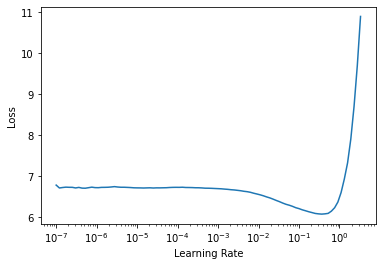

In [ ]:
learn.lr_find()

In [ ]:
lr = 3e-2

In [ ]:
learn.fit_one_cycle(1, lr, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.021860,4.643846,0.276760,103.943298,00:05


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(lr/100,lr), moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.258095,4.511914,0.285635,91.096031,00:05
1,3.983221,4.455410,0.294881,86.091484,00:06
2,3.653678,4.493917,0.295031,89.471222,00:06


Save the fine-tuned model to `path` (default is `learn.model_dir`) with all required files (Model, Encoder, Vocab and SentencePiece-Model)

`path` and `vocab` will be used for training the classifier.

In [ ]:
path = learn.save_lm('tmp/test_lm')
vocab = learn.dls.vocab

### Train the Text Classifier

In [ ]:
dblocks = DataBlock(blocks=(TextBlock.from_df('text', tok=tok, vocab=vocab), CategoryBlock),
                    get_x=ColReader('text'),
                    get_y=ColReader('label'), 
                    splitter=ColSplitter())
dls = dblocks.dataloaders(df, bs=128)

/home/florian/miniconda3/envs/fastai-ulmfit/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


`text_classifier_from_lm` calls `text_classifier_learner` to create a learner **from the fine-tuned model** `path`.

In [ ]:
learn = text_classifier_from_lm(dls, path=path, metrics=[accuracy]).to_fp16()

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0012022644514217973)

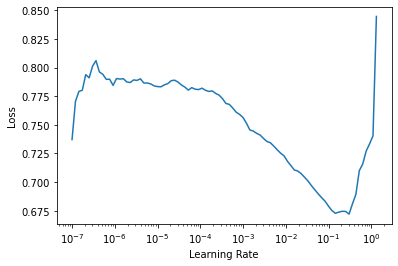

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, 1e-2, moms=(0.8,0.7,0.8), wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.654053,0.650223,0.619927,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.535093,0.608617,0.666777,00:03
1,0.508240,0.649781,0.680963,00:03
2,0.453718,0.633470,0.677994,00:03
3,0.395113,0.655314,0.695480,00:03
4,0.345603,0.674392,0.683933,00:03


# Extract Sentence Embeddings

In [ ]:
from fastai_ulmfit.embeddings import SentenceEmbeddingCallback
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
se = SentenceEmbeddingCallback(pool_mode='concat')
_ = learn.get_preds(cbs=[se])

In [ ]:
feat = se.feat
pca = PCA(n_components=2)
pca.fit(feat['vec'])
coords = pca.transform(feat['vec'])
target_labels = [dls.vocab[1][l] for l in feat['y']]
pred_labels = [dls.vocab[1][l] for l in feat['pred']]
df_preds = pd.DataFrame({'x': coords[:,0], 'y': coords[:,1], 
                         'text': feat['text'], 
                         'target_labels': target_labels, 
                         'pred_labels': pred_labels, 
                         'color': feat['pred']})

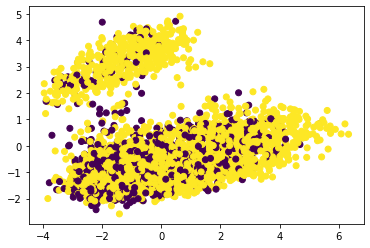

In [ ]:
plt.scatter(df_preds['x'].tolist(), df_preds['y'].tolist(), c=df_preds['color'].tolist(), cmap='viridis')